In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import seaborn as sns; sns.set()  # for plot styling
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy

In [2]:
user_counts = pd.read_csv("../profiles/question_counts.csv", encoding='latin1', index_col='Id')

In [3]:
user_counts.head()

,flex,actionscript-3,svn,sql,asp.net,algorithm,colors,c#,.net,c++,...,meteor,laravel,firebase,parse.com,typescript,docker,apache-spark,reactjs,spring-boot,ionic-framework
Id,,,,,,,,,,,,,,,,,,,,,
26.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2089740.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91.0,0.0,0.0,2.0,0.0,5.0,1.0,0.0,9.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
user_questions_normalized = StandardScaler().fit_transform(user_counts)

### PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(user_questions_normalized)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [66]:
targeted_users = user_counts[ (user_counts['ios'] > 10)].index.tolist()
targeted_users_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users]
targeted_plot_users = principalDf[principalDf.index.isin(targeted_users_index)]

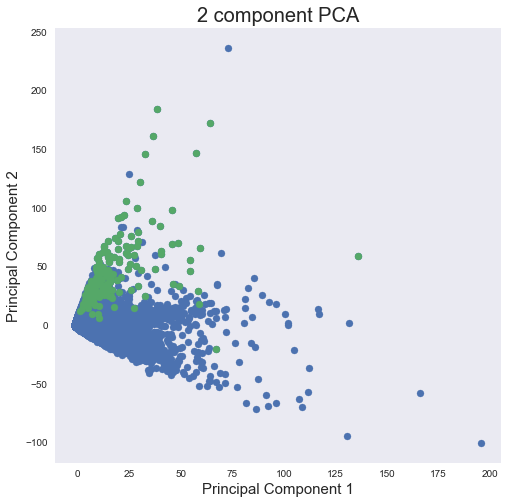

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
ax.scatter(targeted_plot_users['principal component 1'], targeted_plot_users['principal component 2'])
ax.grid()

## TSNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=500, n_components=2).fit_transform(user_questions_normalized[:])

In [ ]:
scatter(X_tsne[:, 0], X_tsne[:, 1])
title('TSNE')
fig = plt.figure(figsize = (8,8))
plt = fig.add_subplot(1,1,1) 
plt.set_xlabel('Principal Component 1', fontsize = 15)
plt.set_ylabel('Principal Component 2', fontsize = 15)
plt.set_title('2 component PCA', fontsize = 20)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.scatter(datetime_plot_users['principal component 1'], datetime_plot_users['principal component 2'])
plt.grid()